### Panagiotidis Panagiotis AM 1115201500200
### Abatzidis Georgios AM 1115201400008

In [1]:
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn import svm
from nltk.stem import PorterStemmer
from sklearn.metrics import f1_score
import nltk
from nltk.stem import  WordNetLemmatizer
import re
import pickle
import warnings 
from collections import Counter 

warnings.filterwarnings(action = "ignore")
lemmatizer = WordNetLemmatizer() #
stopWords = ENGLISH_STOP_WORDS
tweets_train = [] #keep clean tweets from the train_set
tweets_test = [] #keep clean tweets from the test_set

In [2]:
def getcloud(tweets,name):
    tokens = []
    for s in tweets:
        l = s.split()
        for i in l:
            tokens.append(i)

    count = Counter(tokens)
    s = count.most_common(100)
    raw_string = []
    for w in s:
        raw_string.append(w[0])

    raw_string = ' '.join(raw_string)
    wordcloud = WordCloud(background_color="white",stopwords=stopWords).generate(raw_string)
    plt.imsave('./wordclouds/'+name+'.png',wordcloud)
    del tweets


In [3]:
positive_tweets=[]
negative_tweets=[]
neutral_tweets=[]

train_data = pd.read_csv('../twitter_data/train2017.tsv',header=None,engine="python",delimiter='\t+',escapechar="\\")

for i in range(len(train_data)):
    lc = train_data.iloc[i][3].lower()
    clean_string = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]"," ",lc).split()) # remove special chars and links
    tokens = nltk.word_tokenize(clean_string)
    filtered = [w for w in tokens if not w in stopWords]
    lem = ' '.join([lemmatizer.lemmatize(w) for w in filtered])
    lem = re.sub(r'\b\w{1,3}\b', '', lem) # remove words with 2 or less letters
    tweets_train.append(lem)
    if(train_data.iloc[i][2] == "positive"):
        positive_tweets.append(lem)
    elif (train_data.iloc[i][2] == "neutral"):
        neutral_tweets.append(lem)
    elif (train_data.iloc[i][2] == "negative"):
        negative_tweets.append(lem)


del train_data
getcloud(tweets_train,"all")
getcloud(positive_tweets,"positive")
getcloud(neutral_tweets,"neutral")
getcloud(negative_tweets,"negative")



# Print the 100 most common words for every tweet and then for every positive,neutral or negative

# All tweets 
<img src="wordclouds/all.png">

# Positive tweets
<img src="wordclouds/positive.png">

# Neutral tweets
<img src="wordclouds/neutral.png">

# Negative tweets
<img src="wordclouds/negative.png">

# Loading all necessary data

In [2]:
warnings.filterwarnings(action = "ignore")
lemmatizer = WordNetLemmatizer() #
stopWords = ENGLISH_STOP_WORDS
tweets_train = [] #keep clean tweets from the train_set
tweets_test = [] #keep clean tweets from the test_set
correct_data = pd.read_csv('../twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt',header=None,engine="python",delimiter='\t+',escapechar="\\")
# correct_data = correct_data[0:5000]

train_data = pd.read_csv('../twitter_data/train2017.tsv',header=None,engine="python",delimiter='\t+',escapechar="\\")
# train_data = train_data[0:5000]

test_data = pd.read_csv('../twitter_data/test2017.tsv',header=None,engine="python",delimiter='\t+',escapechar="\\")
# test_data = test_data[0:5000]

# Clean data from links,numbers,special characters and words less than three letters
# Keep the lemmatized tweets for the two sets in their respective lists

In [3]:
tweets_train = [] #keep clean tweets from the train_set
tweets_test = [] #keep clean tweets from the test_set

for i in range(len(train_data)):
    lc = train_data.iloc[i][3].lower()
    clean_string = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]"," ",lc).split())
    tokens = nltk.word_tokenize(clean_string)
    filtered = [w for w in tokens if not w in stopWords]
    lem = ' '.join([lemmatizer.lemmatize(w) for w in filtered])
    lem = re.sub(r'\b\w{1,3}\b', '', lem)
    tweets_train.append(lem)
    
for i in range(len(test_data)):
    lc = test_data.iloc[i][3].lower()
    clean_string = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]"," ",lc).split())
    tokens = nltk.word_tokenize(clean_string)
    filtered = [w for w in tokens if not w in stopWords]
    lem = ' '.join([lemmatizer.lemmatize(w) for w in filtered])
    lem = re.sub(r'\b\w{1,3}\b', '', lem)
    tweets_test.append(lem)
    
train_data[3] = tweets_train
test_data[3] = tweets_test

# Use Bag Of Words features to calculate data accuracy

In [6]:

vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=3000, stop_words=ENGLISH_STOP_WORDS) 
neib = KNeighborsClassifier(n_neighbors=5)

bow_xtrain = vectorizer.fit_transform(train_data[3])
bow_xtest = vectorizer.fit_transform(test_data[3])

# pickle.dump(vectorizer,open('./features/bowvect.pkl','wb'))

svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(bow_xtrain,train_data[2])
# pickle.dump(vectorizer,open('./features/bowscv.pkl','wb'))

prediction = svc.predict(bow_xtest)
svc_score = f1_score(correct_data[1],prediction,average='macro')

k = neib.fit(bow_xtrain,train_data[2])
prediction = k.predict(bow_xtest)
knn_score = f1_score(correct_data[1],prediction,average='macro')

print "svc_score is ",svc_score
print "knn_score is ",knn_score


svc_score is  0.3447705632858969
knn_score is  0.31215352815765884


In [33]:
bow_svc = 0.3447705632858969
bow_knn = 0.31215352815765884

# Use TF IDF features to calculate data accuracy

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=3000, stop_words=ENGLISH_STOP_WORDS) 

bow_xtrain = tfidf_vectorizer.fit_transform(train_data[3])
bow_xtest = tfidf_vectorizer.fit_transform(test_data[3])
# pickle.dump(tfidf_vectorizer,open('./features/tfidfvect.pkl','wb'))

svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(bow_xtrain,train_data[2])
# pickle.dump(tfidf_vectorizer,open('./features/tfidfscv.pkl','wb'))
prediction = svc.predict(bow_xtest)
svc_score = f1_score(correct_data[1],prediction,average='weighted')

k = neib.fit(bow_xtrain,train_data[2])
prediction = k.predict(bow_xtest)
knn_score = f1_score(correct_data[1],prediction,average='weighted')

print "svc_score is ",svc_score
print "knn_score is ",knn_score



svc_score is  0.38239388176378974
knn_score is  0.3724398390575083


In [34]:
tf_svc = 0.38239388176378974
tf_knn = 0.3724398390575083

# Create and train a model using the train set

In [2]:
import numpy as np
import nltk
import re
import pickle
import pandas as pd
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn import svm
from nltk.stem import PorterStemmer
from sklearn.metrics import f1_score
from sklearn.manifold import TSNE

fsize = 300
#model is trained once for 300 features and a window size of 5
#it is saved and later loaded to avoid re-training and to save time

# tokenized_tweet_train = train_data[3].apply(lambda x: x.split()) 
# model = gensim.models.Word2Vec(
#             tokenized_tweet_train,
#             size=fsize, # desired no. of features/independent variables
#             window=5, # context window size
#             min_count=1,
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             workers= 4 ,#no.of cores
#             seed = 34) 

# model.train(tokenized_tweet_train, total_examples= len(train_data[3]), epochs=20)
# model.save('./trainmodel')



# Calculate the mean vector for each tweet

In [5]:
def getmean(words,model):
    vectors = []
    for w in words: 
        if w in model: # if the word exists in the model vocabulary get the vector
            vectors.append(model[w])
        else:
            vectors.append(np.random.random(model.vector_size)*2-1) # else create a random vector of n features
    if(len(vectors)) > 0:
        return np.mean(vectors,axis=0) # return the mean of vectors of words in tweet
    else:
        return np.zeros(model.vector_size,dtype = np.float32) # if the sentence is empty return a random vector

In [3]:
#load model if it already has been trained
model = gensim.models.Word2Vec.load('./trainmodel')

In [21]:
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    count = 0
    for word in model.wv.vocab:
        if(count >= 100):
            break
        tokens.append(model[word])
        labels.append(word)
        count +=1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
               textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.savefig('tsne_plot.png')

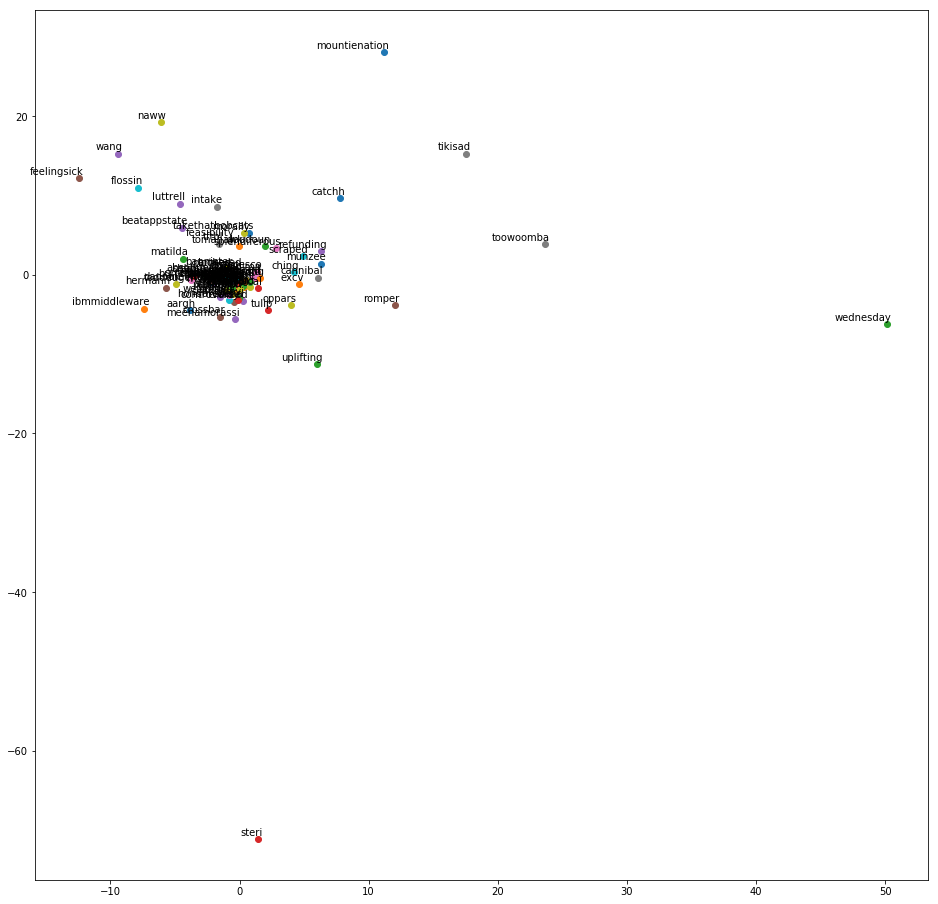

In [22]:
#for only 100 words the plot remains undreable
tsne_plot(model)

In [12]:
#get mean vector for each tweet in test data
allmean_test = np.zeros((len(test_data[3]),fsize))
for i in range(len(test_data[3])):
    tokenized = test_data.iloc[i][3].split()
    allmean_test[i] = getmean(tokenized,model)

In [13]:
#get mean vector for each tweet in train data
allmean = np.zeros((len(train_data[3]),fsize))
for i in range(len(train_data[3])):
    tokenized = train_data.iloc[i][3].split()
    allmean[i] = getmean(tokenized,model)

    

In [9]:
#pass the data to the classificator
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(allmean,train_data[2])
prediction = svc.predict(allmean_test)
svc_score = f1_score(correct_data[1],prediction,average='macro')

In [12]:
#same as above cell
neib = KNeighborsClassifier(n_neighbors=5)
k = neib.fit(allmean,train_data[2])
prediction = k.predict(allmean_test)
knn_score = f1_score(correct_data[1],prediction,average='macro')

print "svc_score is ",svc_score
print "knn_score is ",knn_score


svc_score is  0.41533750730187363
knn_score is  0.4204438305102485


In [35]:
emb_svc = 0.41533750730187363
emb_knn = 0.4204438305102485

# Get lexica files

In [7]:
#create a dictionary for the lexica
def createdict(df):
    d = dict()
    for i in range(len(df)):
        d[df[0][i]]=df[1][i]
    return d

In [16]:
#only tested with affin lexica
#most others contain non-normalized values
affin_data = pd.read_csv('../lexica/affin/affin.txt',header=None,engine="python",delimiter='\t+',escapechar="\\")
affin = createdict(affin_data)
del affin_data

# emot_data = pd.read_csv('../lexica/emotweet/valence_tweet.txt',header=None,engine="python",delimiter='\t+',escapechar="\\")
# emot = createdict(emot_data)
# del emot_data
# generic = pd.read_csv('./lexica/generic/generic.txt',header=None,engine="python",delimiter='\t+',escapechar="\\")
# nrc = pd.read_csv('./lexica/nrc/val.txt',header=None,engine="python",delimiter='\t+',escapechar="\\")
# nrctag = pd.read_csv('./lexica/nrctag/val.txt',header=None,engine="python",delimiter='\t+',escapechar="\\")
lexica =[]
lexica.append(affin)
# lexica.append(emot)
# lexica.append(nrc)
# lexica.append(nrctag)
# lexica.append(generic)


# Function to calculate mean valence for each tweet

In [9]:
import random
def getmeanval(sentence,meanvector):
    
    
    tokenized = sentence.split()
    for l in lexica:
        sentence_val = 0 
        words_found = 0
        for w in tokenized:
            val = searchword(w,l)
            if(val != None):
                words_found += 1
                sentence_val += float(val)
            else:
                continue
        if(words_found == 0):
            meanvector = np.append(meanvector,random.uniform(-1, 1))
        else:
            meanvector = np.append(meanvector,sentence_val/words_found)
    
    return meanvector

# Search for word w in lexica l

In [10]:
def searchword(w,l):
#     affin[affin[0] == 'aborts'].index[0]
#     'tr' in affin[0].unique()
    if w in l:
        return l[w] # return valence value
    return None # word not found

# Load mean vectors for train and test set if needed

In [12]:
#uncomment if running only for added features
# import pickle
# # pickle.dump(allmean,open('./means/allmean.pkl','wb'))
# # pickle.dump(allmean_test,open('./means/allmean_test.pkl','wb'))
# allmean = pickle.load( open( "./means/allmean.pkl", "rb" ) )
# allmean_test = pickle.load( open( "./means/allmean_test.pkl", "rb" ) )

# Add feature in each vector and save to extended_mean

In [17]:
ext_mean_train = np.zeros((len(train_data[3]),fsize+len(lexica)))
ext_mean_test = np.zeros((len(test_data[3]),fsize+len(lexica)))

for i in range(len(train_data[3])):
    ext_mean_train[i] = getmeanval(train_data.iloc[i][3],allmean[i])

for i in range(len(test_data[3])):
    ext_mean_test[i] = getmeanval(test_data.iloc[i][3],allmean_test[i])

In [22]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc = svc.fit(ext_mean_train,train_data[2])
prediction_svc = svc.predict(ext_mean_test)


In [23]:
#dump svc model once
# pickle.dump(svc,open('./features/scvmyfeat.pkl','wb'))

In [37]:
myfeat_svc = f1_score(correct_data[1],prediction,average = 'weighted')
print "myfeat_svc is ",myfeat_svc

myfeat_svc is  0.523127656407497


In [29]:
neib = KNeighborsClassifier(n_neighbors=3,algorithm='auto') # faster than svc
k = neib.fit(ext_mean_train,train_data[2])
prediction_knn = k.predict(ext_mean_test)

In [30]:
# pickle.dump(k,open('./features/kmyfeat.pkl','wb'))

In [38]:
myfeat_knn = f1_score(correct_data[1],prediction_knn,average='weighted')
print "myfeat_knn is ",myfeat_knn

myfeat_knn is  0.48446346286258346


|  F1 Score    | BOW-features   | TF-IDF Features | word embeddings | word embeddings + mean valence|
|------|------|------|------|------|
| SVC  | 0.3447705632858969|0.38239388176378974|0.41533750730187363|0.523127656407497
| KNN  |     0.31215352815765884 |0.3724398390575083|0.4204438305102485|0.48446346286258346


Word embedding + mean valence for each tweet show the best accuracy for the test set